In [658]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import os
import json
from pprint import pprint
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from math import e

from modules.JSONFramer import JSONFramer

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [659]:
# ChatGPT 
def get_nested_value(data, *keys):
    try:
        for key in keys:
            data = data[key]
        return data
    except (TypeError, KeyError):
        return None

#make list of file names in data folder
file_list = os.listdir('../data')

# Create a dataframe to store all data
all_data = pd.DataFrame()

# i = 0

#loop through filenames in list 
for file in file_list:
    # i += 1
    # print(i)
    try:
        #load json object
        with open('../data/' + file) as f:
            nested_json = json.load(f)
            response_data = nested_json['data']['results']
            # List to store data from file
            extracted_data = []
            for result in response_data:
                row = {
                    'branding_name': nested_json['data']['results'][0]['branding'][0]['name'],  
                    'baths': get_nested_value(result, 'description', 'baths'),
                    'baths_1qtr': get_nested_value(result, 'description', 'baths_1qtr'),
                    'baths_3qr': get_nested_value(result, 'description', 'baths_3qr'),
                    'baths_full': get_nested_value(result, 'description', 'baths_full'),
                    'baths_half': get_nested_value(result, 'description', 'baths_half'),
                    'beds': get_nested_value(result, 'description', 'beds'),
                    'garage': get_nested_value(result, 'description', 'garage'),
                    'lot_sqft': get_nested_value(result, 'description', 'lot_sqft'),
                    'name': get_nested_value(result, 'description', 'name'),
                    'sold_date': get_nested_value(result, 'description', 'sold_date'),
                    'sold_price': get_nested_value(result, 'description', 'sold_price'),
                    'sqft': get_nested_value(result, 'description', 'sqft'),
                    'stories': get_nested_value(result, 'description', 'stories'),
                    'sub_type': get_nested_value(result, 'description', 'sub_type'),
                    'type': get_nested_value(result, 'description', 'type'),
                    'year_built': get_nested_value(result, 'description', 'year_built'),                    
                    'is_coming_soon': get_nested_value(result, 'flags', 'is_coming_soon'),
                    'is_contingent': get_nested_value(result, 'flags', 'is_contingent'),
                    'is_for_rent': get_nested_value(result, 'flags', 'is_for_rent'),
                    'is_foreclosure': get_nested_value(result, 'flags', 'is_foreclosure'),
                    'is_new_construction': get_nested_value(result, 'flags', 'is_new_construction'),
                    'is_new_listing': get_nested_value(result, 'flags', 'is_new_listing'),
                    'is_pending': get_nested_value(result, 'flags', 'is_pending'),
                    'is_plan': get_nested_value(result, 'flags', 'is_plan'),
                    'is_price_reduced': get_nested_value(result, 'flags', 'is_price_reduced'),
                    'is_subdivision': get_nested_value(result, 'flags', 'is_subdivision'),                   
                    'last_update_date': get_nested_value(result, 'last_update_date'),
                    'show_contact_an_agent': get_nested_value(result, 'lead_attributes', 'show_contact_an_agent'),
                    'list_date': get_nested_value(result, 'list_date'),
                    'list_price': get_nested_value(result, 'list_price'),
                    'listing_id': get_nested_value(result, 'listing_id'),
                    'city': get_nested_value(result, 'location', 'address', 'city'),
                    'lat': get_nested_value(result, 'location', 'address', 'coordinate', 'lat'),
                    'lon': get_nested_value(result, 'location', 'address', 'coordinate', 'lon'),
                    'line': get_nested_value(result, 'location', 'address', 'line'),
                    'postal_code': get_nested_value(result, 'location', 'address', 'postal_code'),
                    'state': get_nested_value(result, 'location', 'address', 'state'),
                    'state_code': get_nested_value(result, 'location', 'address', 'state_code'),
                    'open_houses': get_nested_value(result, 'open_houses'),
                    'price_reduced_amount': get_nested_value(result, 'price_reduced_amount'),
                    'brand_name': get_nested_value(result, 'products', 'brand_name'),
                    'property_id': get_nested_value(result, 'property_id'),
                    'status': get_nested_value(result, 'status'),
                    'tags': get_nested_value(result, 'tags'),
                }
                extracted_data.append(row)
        extracted_dataframe = pd.DataFrame(extracted_data).drop_duplicates("property_id")
        all_data = pd.concat([all_data, extracted_dataframe])
    except:
        continue
df = all_data
# # print(all_data.info())
print(df.shape)
df.head(3)

(8159, 45)


,branding_name,baths,baths_1qtr,baths_3qr,baths_full,baths_half,beds,garage,lot_sqft,name,sold_date,sold_price,sqft,stories,sub_type,type,year_built,is_coming_soon,is_contingent,is_for_rent,is_foreclosure,is_new_construction,is_new_listing,is_pending,is_plan,is_price_reduced,is_subdivision,last_update_date,show_contact_an_agent,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,open_houses,price_reduced_amount,brand_name,property_id,status,tags
0,Home Real Estate,2.0,None,None,2.0,NaN,3.0,1.0,3485.0,None,2024-01-16,259900,1963.0,2.0,None,single_family,1933.0,None,None,None,None,None,False,None,None,False,None,2024-01-16T18:11:11Z,True,2023-12-04T22:28:39.000000Z,259900,2962222019,Lincoln,40.783403,-96.696476,1707 Otoe St,68502,Nebraska,NE,None,10000.0,essentials,8474302107,sold,"[central_air, community_outdoor_space, den_or_..."
1,Home Real Estate,4.0,None,None,3.0,1.0,6.0,3.0,13939.0,None,2024-01-16,644000,4006.0,2.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2024-01-16T18:25:07Z,True,2023-09-07T16:39:30.000000Z,639000,2959451155,Lincoln,40.750953,-96.616857,7620 Stevens Ridge Rd,68516,Nebraska,NE,None,NaN,essentials,7691862344,sold,"[central_air, community_outdoor_space, dining_..."
2,Home Real Estate,4.0,None,None,4.0,NaN,6.0,2.0,6098.0,None,2024-01-16,355000,2774.0,2.0,None,single_family,1988.0,None,None,None,None,None,False,None,None,None,None,2024-01-16T16:36:15Z,True,2023-12-08T21:21:14.000000Z,359900,2962346182,Lincoln,40.859955,-96.68886,2118 Preamble Ct,68521,Nebraska,NE,None,NaN,essentials,7106649355,sold,"[central_air, community_outdoor_space, cul_de_..."


In [660]:
df.reset_index(drop=True, inplace=True)
# df.info()

In [661]:
#count unique property ids
df['property_id'].nunique()
#1795 unique property_ids in a dataframe of 8159 rows indicates that row duplication exists for each property

1795

In [662]:
#display df sorted by 'property_id' column to visually inspect the data
df.sort_values(by=['property_id']).head(6)
#Quick check shows that multiple values for 'branding_name' column exist for each property_id

,branding_name,baths,baths_1qtr,baths_3qr,baths_full,baths_half,beds,garage,lot_sqft,name,sold_date,sold_price,sqft,stories,sub_type,type,year_built,is_coming_soon,is_contingent,is_for_rent,is_foreclosure,is_new_construction,is_new_listing,is_pending,is_plan,is_price_reduced,is_subdivision,last_update_date,show_contact_an_agent,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,open_houses,price_reduced_amount,brand_name,property_id,status,tags
6194,Compass,3.0,None,None,3.0,NaN,3.0,5.0,43560,None,2023-12-15,925000,2980.0,1.0,None,single_family,1978.0,None,None,None,None,None,False,None,None,None,None,2023-12-15T21:25:24Z,True,2023-09-25T16:20:27.000000Z,925000,2959966417,Carson City,39.093819,-119.79112,3527 Arcadia Dr,89705,Nevada,NV,None,NaN,basic_opt_in,1003442504,sold,"[community_outdoor_space, energy_efficient, fa..."
1837,"Weichert, Realtors - Courtney Valleywide",3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."
7199,My Home Group Real Estate,3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."
571,Cooper Premier Properties Llc,3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."
6386,Keller Williams Realty Sonoran Living,3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."
3479,"Sell Your Home Services, Inc.",3.0,None,None,3.0,None,4.0,2.0,95832.0,None,2023-12-22,625600,2136.0,1.0,None,single_family,1996.0,None,None,None,None,None,False,None,None,None,None,2023-12-23T09:05:36Z,True,2023-11-20T16:22:33.000000Z,600000,2961854149,Phoenix,33.804177,-112.056055,35033 N 12th St,85086,Arizona,AZ,None,NaN,basic_opt_in,1007849822,sold,"[single_story, garage_1_or_more, garage_2_or_m..."


In [663]:
#check shape of the df after dropping duplicated 'branding_name' column and unhashable 'tags' column
temp_dataframe = df.drop(columns =['branding_name','tags'])
temp_dataframe.drop_duplicates().shape
#1795 rows is same number as unique property ids, therefore eliminating the branding_name column will remove duplicates

(1795, 43)

In [664]:
# #Note: the 'tags' column was checked for duplication by converting the list type of each value to a string and then applying '.drop_duplicates'

# def tags_to_string...

# string_data = all_data
# string_data.loc[:, 'tags'] = string_data['tags'].apply(lambda x: tags_to_string(x))

# string_data.drop_duplicates().info()

# # No duplication was found

In [665]:
#check to see how many unique 'branding_name' values there are (just in case there were only a few and we could keep this column)
len(df['branding_name'].unique())
#As expected, there are too many (172) so the column can be dropped

172

**-Drop Columns:**

In [666]:
#drop the 'branding_name' column 
#also drop all columns with 0 non-null values including the following:
df = df.drop(columns = ['branding_name', 'baths_1qtr', 'baths_3qr', 'name', 'is_coming_soon', 'is_contingent', 'is_for_rent', 'is_new_construction', 'is_pending', 'is_plan', 'is_subdivision', 'open_houses'])

# df = dataframe.drop_duplicates()
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6429 entries, 0 to 8158
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   list_price  6429 non-null   int64
 1   sold_price  6429 non-null   int64
dtypes: int64(2)
memory usage: 150.7 KB
None
RMSE between list_price and sold_price:86375.53238964612
9965.930201910067 0.9587782230791552


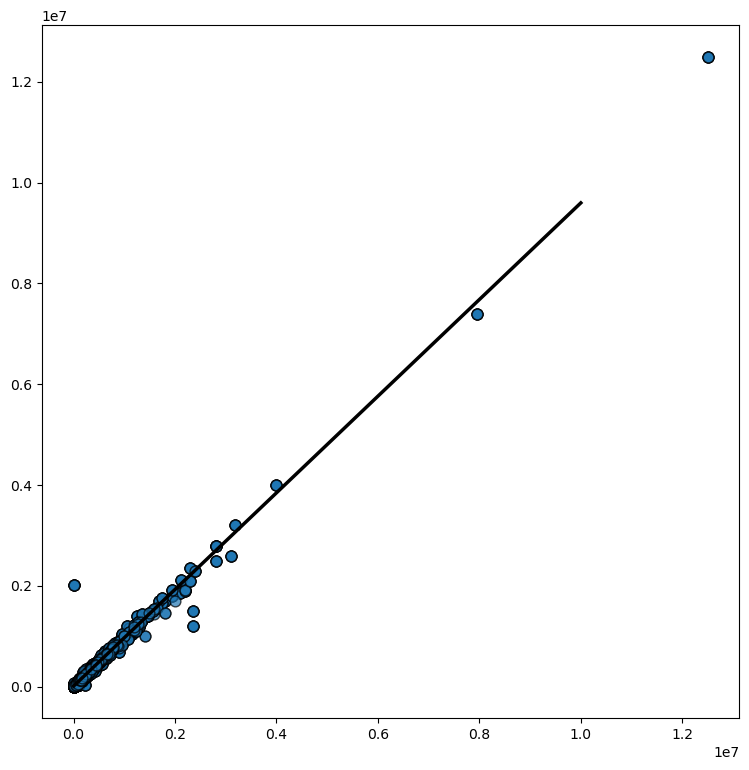

In [671]:
from sklearn.metrics import mean_squared_error

list_sold_df = df[(df['list_price'].notna()) & (df['sold_price'].notna())][['list_price', 'sold_price']]
list_sold_df['list_price'] = pd.to_numeric(list_sold_df['list_price'])
list_sold_df['sold_price'] = pd.to_numeric(list_sold_df['sold_price'])

print(list_sold_df.info())

print("RMSE between list_price and sold_price:" + str(mean_squared_error(list_sold_df['list_price'], list_sold_df['sold_price'], squared=False)))

fig, ax = plt.subplots(figsize = (9, 9))

ax.scatter(list_sold_df['list_price'], list_sold_df['sold_price'], s=60, alpha=0.7, edgecolors="k")

b, a = np.polyfit(list_sold_df['list_price'], list_sold_df['sold_price'], deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 10000000, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

print(a, b)

**-Explore rows where target column is null:** 

In [543]:
df_without_type = df.drop(columns='tags')
df_without_type.drop_duplicates(inplace=True)
print(len(df_without_type))

print(len(df_without_type[df_without_type['sold_price'].isna()]))
print(len(df_without_type[df_without_type['sold_price' and 'list_price'].isna()]))
df_without_type[df_without_type['sold_price' and 'list_price'].isna()].head()

1795
320
98


,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_date,sold_price,sqft,stories,sub_type,type,year_built,is_foreclosure,is_new_listing,is_price_reduced,last_update_date,show_contact_an_agent,list_date,list_price,listing_id,city,lat,lon,line,postal_code,state,state_code,price_reduced_amount,brand_name,property_id,status
241,0.0,None,None,None,None,None,2023-09-27,None,None,None,None,single_family,1940.0,None,None,None,2024-01-02,True,None,None,None,Bismarck,46.133024,-100.163732,1426 Pocatello Dr,58504,North Dakota,ND,None,None,9864036505,sold
242,0.0,None,None,None,None,None,2023-09-08,None,None,None,None,condo,NaN,None,None,None,2023-11-03,True,None,None,None,Bismarck,NaN,NaN,7107 N 19th St Unit 108,58503,North Dakota,ND,None,None,9856795451,sold
410,0.0,NaN,NaN,NaN,NaN,NaN,2023-12-27,27065000.0,NaN,NaN,None,single_family,NaN,None,None,None,2024-01-04,True,None,NaN,None,Springfield,NaN,NaN,3501 Old Jacksonville Rd,62711,Illinois,IL,NaN,None,9627477899,sold
429,0.0,NaN,NaN,NaN,NaN,NaN,2023-08-14,119900.0,NaN,NaN,None,condo,NaN,None,None,None,2023-10-30,True,None,NaN,None,Springfield,39.820301,-89.704559,83 Amherst Dr,62702,Illinois,IL,NaN,None,8559138865,sold
430,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-11,359900.0,NaN,NaN,None,None,NaN,None,None,None,None,True,None,NaN,None,Springfield,NaN,NaN,4615 Lasalle Ct,62711,Illinois,IL,NaN,None,9526532270,sold


In [544]:
print(df.shape)
#Because our model's target variable is 'sold_price', the values here cannot be NA
#NA sold price represents appx. 18% of our data
#Because we have such a small dataset we will impute the sold_price from the list_price as these two values are typically highly correlated (~1:1)
df['sold_price'] = df['sold_price'].fillna(df['list_price'])
print(df.shape)

#we will still need to drop all rows where list price and sold price is null
df.dropna(subset=['sold_price'], inplace=True)
print(df.shape)

(8159, 33)
(8159, 33)
(8008, 33)


**-Encode 'tags' in columns:**

In [545]:
#we need to explode and one-hot-code the 'tags' column
#(this needs to be done before dropping duplicated as the list data type for tags values is unhashable)

In [546]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
s = df['tags'].apply(lambda x: x if x is not None else [])
binarized_tags = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=df.index)

binarized_tags.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8008 entries, 0 to 8158
Columns: 155 entries, baseball to wrap_around_porch
dtypes: int64(155)
memory usage: 9.5 MB


In [547]:
df = df.merge(binarized_tags, left_index=True, right_index=True).drop(columns='tags')
df = df.drop_duplicates()

In [548]:
df.columns

Index(['baths', 'baths_full', 'baths_half', 'beds', 'garage', 'lot_sqft',
       'sold_date', 'sold_price', 'sqft', 'stories',
       ...
       'views', 'volleyball', 'washer_dryer', 'water_view', 'waterfront',
       'well_water', 'white_kitchen', 'wine_cellar', 'wooded_land',
       'wrap_around_porch'],
      dtype='object', length=187)

In [549]:
#Drop 'tags' column
#Perform count for all newly created binary tag columns / by total row count
#Drop all binary tag columns that are represented in less that [10%?] of the data



binarized_tags_dict = (df.loc[:, mlb.classes_.tolist()].sum()/df.shape[0]).to_dict()

binarized_tags_list = []

for key in binarized_tags_dict.keys():
    if binarized_tags_dict[key] < 0.05:
        binarized_tags_list.append(key)

print(binarized_tags_list[0:5])
len(binarized_tags_list)

['baseball', 'basketball', 'basketball_court', 'beach', 'beautiful_backyard']


108

In [550]:
df = df.drop(columns=binarized_tags_list)

In [551]:
# df.info()

**-Fill N/A Values**

In [552]:
#fill N/A values with zeros for 'baths_half', 'garage', price_reduced_amount
df.update(df[['baths_full','baths_half', 'garage', 'price_reduced_amount']].fillna(0))

In [553]:
#fill N/A values with 'False' for 'is_price_reduced'
df['is_price_reduced'].fillna(False, inplace=True)

**-Drop more unecessary Columns**

In [554]:
#drop 'sub-type' column as it appears to be either missing or very similar to type in most instances
df.drop(columns='sub_type', inplace=True)

In [555]:
#We can probably drop 'last_update' column as I assume it has to do with website or realtor activity
df.drop(columns='last_update_date', inplace=True)

In [556]:
#Only False values for this column so we can drop it
#It might be the case that None type should be 'True' but I don't think we have enough info to make this inference
df.drop(columns='is_new_listing', inplace=True)

In [557]:
#Not obvious what brand name is - I suggest we drop but we could also just try modelling with it left in
df.drop(columns='brand_name', inplace=True)

In [558]:
#status is always sold so we can drop this
df.drop(columns='status', inplace=True)

In [559]:
df.drop(columns='show_contact_an_agent', inplace=True)

In [560]:
#Do we want to drop the foreclosure column because so few data points exist?
df.drop(columns='is_foreclosure', inplace=True)
#Alternatively we can just fill thse values null values with False

**-Fill NA values with zeros for 'baths','beds', 'sqft', 'stories', 'year_built' columns where value in 'type' column == land**

In [561]:
# NA value check prior to fill
# df[df['beds'].isna()].head(2)
#major reason for NA values in 'baths','beds', 'sqft', 'stories', 'year_built' columns is that 'type' column == land

In [562]:
#fill N/A values with zeros for 'baths','beds', 'sqft', 'stories', 'year_built' columns where value in 'type' column == land
df.update(df.loc[df['type'].isin(['land'])][['baths', 'beds', 'sqft', 'stories', 'year_built']].fillna(0))

In [563]:
# NA value check following fill
# print(df[df['beds'].isna()].shape)

In [564]:
# print(df.info())

#Remaining columns with Null values
# #   Column                       Non-Null Count  Dtype  
# ---  ------                       --------------  -----  
#  0   baths                        1446 non-null   float64
# 3   beds                         1438 non-null   object 
#  5   lot_sqft                     1275 non-null   object 
# 8   sqft                         1402 non-null   object 
#  9   stories                      1190 non-null   object 
#  10  type                         1471 non-null   object 
#  11  year_built                   1400 non-null   object 
# 13  list_date                    1412 non-null   object 
#  14  list_price                   1412 non-null   object 
#  15  listing_id                   1412 non-null   object 
#  16  city                         1474 non-null   object 
#  17  lat                          1435 non-null   object 
#  18  lon                          1435 non-null   object 
#  19  line                         1474 non-null   object 

**-Drop Rows where value is NA for 'type' column**

In [565]:
#Drop rows where 'type' coulmn is NA as listing type is used to fill following columns 
df.dropna(axis=0,subset=['type'], inplace=True)
df.shape
#only 4 listings lost and the rows lost were missing a lot of other features

(1756, 72)

**-Fill NA values in 'baths', 'beds', 'stories' with median value grouped by 'type' column**<br>
**-Fill NA values in 'lot_sqft', 'sqft' with mean value grouped by the 'type' column**

In [566]:
# NA value check prior to fill
# df[df['lot_sqft'].isna()].sample(3)

In [567]:
#Fill NA values in 'baths' column with the median bath value grouped by the corresponding 'type' column  
df['baths'] = df['baths'].fillna(df.groupby('type')['baths'].transform('median'))

#Fill NA values in 'beds' column with the median beds value grouped by the corresponding 'type' column  
df['beds'] = df['beds'].fillna(df.groupby('type')['beds'].transform('median'))

#Fill NA values in 'stories' column with the median stories value grouped by the corresponding 'type' column  
df['stories'] = df['stories'].fillna(df.groupby('type')['stories'].transform('median'))

#Fill NA values in 'lot_sqft' column with the mean lot_sqft value grouped by the corresponding 'type' column  
df['lot_sqft'] = df['lot_sqft'].fillna(df.groupby('type')['lot_sqft'].transform('mean'))

#Fill NA values in 'sqft' column with the mean sqft value grouped by the corresponding 'type' column  
df['sqft'] = df['sqft'].fillna(df.groupby('type')['sqft'].transform('mean'))

In [568]:
# NA value check following fill
# df.loc[df['property_id'].isin(['7526785866', '4104926733', '4750734663'])]

**-Fill NA values in 'year_built' with median value grouped by 'type' column** 

In [569]:
# NA value check prior to fill
# df[df['year_built'].isna()].head(3)

In [570]:
#Fill NA values in 'year_built' column with the median year_built value grouped by the corresponding 'type' column  
df['year_built'] = df['year_built'].fillna(df.groupby('city')['year_built'].transform('median'))

In [571]:
# NA value check following fill
# df.loc[df['property_id'].isin(['9627477899', '8549151593', '8559138865'])]

**-Fill NA values in 'list_price' with value in 'sold_price' column** 

In [572]:
# NA value check prior to fill
# df[df['list_price'].isna()].head(3)

In [573]:
df['list_price'] = df['list_price'].fillna(df['sold_price'])

In [574]:
# NA value check following fill
# df.loc[df['property_id'].isin(['9940859323', '9291003749', '9233144971'])]

**-Fill single missing city value...**

In [575]:
# NA value check prior to fill
# df[df['city'].isna()].head(3)

In [576]:
# #Fill NA values in 'city' column with the median city value grouped by the corresponding 'postal_code' column  
# # Not wokring... Not sure why.  
# df['city'] = df['city'].fillna(df.groupby(['postal_code'])['city'].agg(pd.Series.mode))
# # Fill with 'Boston' for now...

df['city'] = df['city'].fillna('Boston')

In [577]:
# NA value check following fill
# df.loc[df['property_id'].isin(['9712785298'])]

**-Fill NA values for 'lat' and 'lon' with median values grouped by 'state' and 'city' column**

In [578]:
# NA value check prior to fill
# df[df['lat'].isna()].head(3)

In [579]:
#Fill NA values in 'lat' column with the median lat value grouped by the corresponding 'state' and 'city' column  
df['lat'] = df['lat'].fillna(df.groupby(['state', 'city'])['lat'].transform('median'))

In [580]:
#Fill NA values in 'lon' column with the median lon value grouped by the corresponding 'postal_code' column  
df['lon'] = df['lon'].fillna(df.groupby(['state', 'city'])['lon'].transform('median'))

In [581]:
# NA value check following fill
# df.loc[df['property_id'].isin(['9934955122', '9118590787', '9904165467'])]

**-Convert 'sold_date' and 'list_date' to datetime values and remove timestamp from list_date**

In [582]:
#Check prior to datetime and format conversion
# print(df.iloc[:,:14].head(1))

In [583]:
# Convert 'sold_date' and 'list_date' to datetime
df['sold_date'] = pd.to_datetime(df['sold_date'])
# df['list_date'] = pd.to_datetime(df['list_date'], format='mixed')
df['list_date'] = df['list_date'].apply(lambda x: datetime.datetime.strptime(str(x)[:10], '%Y-%m-%d') if x is not None else None)
# df['list_date'] = pd.to_datetime(df['list_date'], format='%Y-%m-%d')
# df['list_date'] = df['list_date'].dt.date
# df['sold_date'] = df['sold_date'].dt.date

In [584]:
#Check following datetime and format conversion
# print(df.iloc[:,:14].head(1))
# print(df['list_date'].dtype)
# print(df['sold_date'].dtype)

**-Fill NA values for list_date with sold_date subtract 75days**

In [585]:
# NA value check prior to fill
# df[df['list_date'].isna()].head(3)

In [586]:
# Fill NA values for list_date with (sold_date - 75days)
# df['list_date'] = df['list_date'].fillna(df['sold_date'])
df['list_date'] = df['list_date'].fillna(df['sold_date'] - pd.Timedelta(days=75))

# Convert the 'list_date' column to datetime format eagain
# df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce')

# Extract only date part again
# df['list_date'] = df['list_date'].apply(lambda x: datetime.date(x))

In [587]:
# NA value check following fill
# print(df['sold_date'].dtype)
# df.loc[df['property_id'].isin(['9940859323', '9291003749', '9233144971'])]

**-Time on Market, Month/Year Sold/Listed Columns**

In [588]:
df['sold_month'] = df['sold_date'].dt.month
df['sold_year'] = df['sold_date'].dt.year

In [589]:
# df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce')
df['list_month'] = df['list_date'].dt.month
df['list_year'] = df['list_date'].dt.year

In [590]:
# df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce')
# df['sold_date'] = pd.to_datetime(df['sold_date'], errors='coerce')

# create 'time_on_market' column calculated as (sold_date - list_date) 
df['time_on_market'] = (df['sold_date'] - df['list_date']).dt.days

**-Drop more columns which are not useful in EDA and modelling**

In [591]:
#Drop 'line' coulmn because it throws off the analysis and is not useful
df.drop(columns='line', inplace=True)

#Drop listing_id because we already have property_id to use as a key and listing_id should not affect sold_price (theoretically:)
df.drop(columns='listing_id', inplace=True)

#Drop datetime columns now that we have created new featured from them that can be more effectively used in analysis
df.drop(columns= ['list_date', 'sold_date'], inplace=True)

**-Replace Type for rare Type**

In [592]:
df['type'].value_counts()

type
single_family                  1188
condos                          182
townhomes                       124
multi_family                    118
land                             82
mobile                           43
condo                            11
apartment                         4
other                             2
condo_townhome_rowhome_coop       1
duplex_triplex                    1
Name: count, dtype: int64

In [593]:
df['type'].mask(df['type'] == "condo_townhome_rowhome_coop", "townhomes", inplace=True)
df['type'].mask(df['type'] == "duplex_triplex", "townhomes", inplace=True)
df['type'].mask(df['type'] == "apartment", "condos", inplace=True)
df['type'].mask(df['type'] == "condo", "condos", inplace=True)

In [594]:
df['type'].value_counts()

type
single_family    1188
condos            197
townhomes         126
multi_family      118
land               82
mobile             43
other               2
Name: count, dtype: int64

**-Drop type = other due to limited data and instances**

In [595]:
indices = df.loc[df['type'].isin(['other'])].index
df = df.drop(index = indices)

In [596]:
df['type'].value_counts()

type
single_family    1188
condos            197
townhomes         126
multi_family      118
land               82
mobile             43
Name: count, dtype: int64

**-Drop type = land due to limited data and extreme feature variance causing poor model performance**

In [597]:
#Raw land sales have extreme feature differences from properties with buildings 
#There are not enough data-points with land as type to build a robust model with these included
#Drop all rows where type = land
land_indices = df.loc[df['type'].isin(['land'])].index
df = df.drop(index = land_indices)

In [598]:
df.shape

(1672, 73)

In [599]:
df['type'].value_counts()

type
single_family    1188
condos            197
townhomes         126
multi_family      118
mobile             43
Name: count, dtype: int64

**-Import and Join US Cities Demographics Data**

In [600]:
#Load csv from Open Data Soft US Cities Demographics 
#Available through: https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/
us_pop_from_csv = pd.read_csv("us-cities-demographics.csv", sep=";")
print(us_pop_from_csv.shape)
us_pop_from_csv.head(3)

(2891, 12)


,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Framingham,Massachusetts,40.3,35442.0,35768.0,71210,2625.0,19070.0,2.49,MA,Black or African-American,6944
1,Waco,Texas,29.3,63452.0,68890.0,132342,10716.0,14235.0,2.57,TX,Asian,4230
2,Fort Worth,Texas,32.6,414126.0,422843.0,836969,39182.0,143404.0,2.88,TX,American Indian and Alaska Native,7504


In [601]:
#Drop all columns not in ["Median Age", "Total Population", "Average Household Size", "State Code"]
us_pop_from_csv.drop(columns = ["Male Population", "Female Population", "Number of Veterans", "Foreign-born", "Race", "Count"], inplace=True)

In [602]:
us_pop_from_csv.drop_duplicates(ignore_index=True, inplace=True)
print("df shape: " + str(us_pop_from_csv.shape))
print("unique city values: " + str(us_pop_from_csv['City'].nunique()))
us_pop_from_csv.head(3)

df shape: (596, 6)
unique city values: 567


,City,State,Median Age,Total Population,Average Household Size,State Code
0,Framingham,Massachusetts,40.3,71210,2.49,MA
1,Waco,Texas,29.3,132342,2.57,TX
2,Fort Worth,Texas,32.6,836969,2.88,TX


**-house_sales dataframe**

In [603]:
# house_sales_from_csv = pd.read_csv('house_sales_test.csv')
house_sales_df = df
print(house_sales_df.shape)
house_sales_df.head(3)

(1672, 73)


,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,type,year_built,is_price_reduced,list_price,city,lat,lon,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market
0,2.0,2.0,0.0,3.0,1.0,3485.0,259900.0,1963.0,2.0,single_family,1933.0,False,259900.0,Lincoln,40.783403,-96.696476,68502,Nebraska,NE,10000.0,8474302107,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2024,12,2023,43
1,4.0,3.0,1.0,6.0,3.0,13939.0,644000.0,4006.0,2.0,single_family,1996.0,False,639000.0,Lincoln,40.750953,-96.616857,68516,Nebraska,NE,0.0,7691862344,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,2024,9,2023,131
2,4.0,4.0,0.0,6.0,2.0,6098.0,355000.0,2774.0,2.0,single_family,1988.0,False,359900.0,Lincoln,40.859955,-96.688860,68521,Nebraska,NE,0.0,7106649355,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2024,12,2023,39


In [604]:
df_full = house_sales_df.merge(us_pop_from_csv, left_on=['city', 'state'], right_on=['City', 'State'], how='left')

In [605]:
df_full.shape
df_full.head(2)

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,type,year_built,is_price_reduced,list_price,city,lat,lon,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market,City,State,Median Age,Total Population,Average Household Size,State Code
0,2.0,2.0,0.0,3.0,1.0,3485.0,259900.0,1963.0,2.0,single_family,1933.0,False,259900.0,Lincoln,40.783403,-96.696476,68502,Nebraska,NE,10000.0,8474302107,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2024,12,2023,43,Lincoln,Nebraska,32.3,277346.0,2.4,NE
1,4.0,3.0,1.0,6.0,3.0,13939.0,644000.0,4006.0,2.0,single_family,1996.0,False,639000.0,Lincoln,40.750953,-96.616857,68516,Nebraska,NE,0.0,7691862344,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,2024,9,2023,131,Lincoln,Nebraska,32.3,277346.0,2.4,NE


In [606]:
print(len(df_full[df_full['Total Population'].isna()]))
df_full[df_full['Total Population'].isna()].head()

446


,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,type,year_built,is_price_reduced,list_price,city,lat,lon,postal_code,state,state_code,price_reduced_amount,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market,City,State,Median Age,Total Population,Average Household Size,State Code
51,2.0,2.0,0.0,2.0,1.0,5227.0,227500.0,1342.0,1.0,single_family,2021.0,False,235000.0,Elgin,34.110015,-80.828435,29045,South Carolina,SC,0.0,9052323034,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2023,10,2023,-1,NaN,NaN,NaN,NaN,NaN,NaN
55,3.0,2.0,1.0,3.0,0.0,8276.0,305000.0,1748.0,1.0,single_family,2021.0,False,309900.0,Elgin,34.136376,-80.831510,29045,South Carolina,SC,0.0,9575838919,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9,2023,6,2023,97,NaN,NaN,NaN,NaN,NaN,NaN
66,2.0,2.0,0.0,3.0,2.0,7405.0,263626.0,1878.0,1.0,single_family,2020.0,False,275000.0,Elgin,34.141238,-80.834563,29045,South Carolina,SC,0.0,9678401203,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,8,2023,2,2023,165,NaN,NaN,NaN,NaN,NaN,NaN
89,4.0,2.0,2.0,3.0,2.0,1742.0,589900.0,1930.0,2.0,townhomes,1981.0,False,589900.0,Garden City,43.652430,-116.261039,83703,Idaho,ID,10000.0,2024181004,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,2024,9,2023,107,NaN,NaN,NaN,NaN,NaN,NaN
96,2.0,2.0,0.0,3.0,3.0,17424.0,1200000.0,2910.0,1.0,single_family,1993.0,False,1200000.0,Garden City,43.668971,-116.295181,83714,Idaho,ID,0.0,2572081337,0,0,0,0,1,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,2024,12,2023,33,NaN,NaN,NaN,NaN,NaN,NaN


In [607]:
df = df_full

**-Fill NA values for Total Population, Median Age, Average Household Size**

In [608]:
#For all cities with NA values for Total Population, fill with 33,000
# Open Data Soft US Cities Demographics only lists cities with population of 65,000 or more
df['Total Population'] = df['Total Population'].fillna(33000)

In [609]:
#Fill all NA values with mean of column for Median Age and Average Household Size Columns 
df[['Median Age', 'Average Household Size']] = df[['Median Age', 'Average Household Size']].fillna(df[['Median Age', 'Average Household Size']].mean())

**-Drop City, State, State Code columns**

In [610]:
df.drop(columns=['City', 'State', 'State Code'], inplace=True)

**-Check for duplicates in 'property_id' column**

In [611]:
#count unique property ids
df['property_id'].nunique()

1672

In [612]:
# df.info()

**-Drop all rows that still have NA values**

In [613]:
#The following columns still have NA values:
# df.info()
 # 5   lot_sqft                     1465 non-null   float64
 # 7   sqft                         1465 non-null   float64
 # 8   stories                      1465 non-null   float64
 # 10  year_built                   1463 non-null   float64
 # 14  lat                          1460 non-null   float64
 # 15  lon                          1460 non-null   float64
#Probably these were unable to fill via groupby medians, etc.

In [614]:
#Fill all NA values with mean of column
df[['lot_sqft', 'sqft', 'stories', 'year_built', 'lat', 'lon']] = df[['lot_sqft', 'sqft', 'stories', 'year_built', 'lat', 'lon']].fillna(df[['lot_sqft', 'sqft', 'stories', 'year_built', 'lat', 'lon']].mean())

**-Change data types of columns to enable EDA**

In [615]:
# Change dtype of target column to float
df['sold_price'] = df['sold_price'].astype(float)

# Change column data types to int where required
df = df.astype({'baths': int,'baths_full': int,'baths_half': int,'beds': int,'garage': int,'stories': int,'stories': int,'year_built': int})

# Change column data types to float where required
df = df.astype({'lot_sqft': float,'sold_price': float,'sqft': float,'list_price': float,'lat': float,'lon': float,'price_reduced_amount': float})

# Leave non-numeric columns as follows:
# type                            object
# is_price_reduced                  bool
# city                            object
# postal_code                     object
# state                           object
# state_code                      object
# property_id                     object

In [616]:
# print(df.dtypes)

**-Drop columns not supplied as true predictive model input**

In [617]:
#Drop columns that would not be supplied as a true predictive model input including: list_price, price_reduced_amount
df.drop(columns= ['list_price', 'price_reduced_amount'], inplace=True)

**-EDA**

In [618]:
df.describe()
#some max values are suspect including: baths, beds, garage, sqft, stories
#the min value of year built is not true

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,year_built,lat,lon,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market,Median Age,Total Population,Average Household Size
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1.672000e+03,1.672000e+03,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.00000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1.672000e+03,1672.000000
mean,2.272129,1.804426,0.329545,3.217703,1.117225,3.633067e+05,4.551224e+05,1930.789469,1.519139,1967.571770,39.039125,-92.224240,0.436005,0.118421,0.075359,0.080144,0.556818,0.196770,0.139952,0.471890,0.211722,0.101077,0.083732,0.193182,0.489833,0.067584,0.093900,0.158493,0.085526,0.146531,0.446770,0.13756,0.421651,0.058014,0.619617,0.425837,0.069976,0.061603,0.324761,0.068780,0.056818,0.296651,0.053828,0.078947,0.109450,0.079545,0.070574,0.077751,0.251794,0.114833,0.245215,0.434809,0.052632,0.075359,0.406100,0.103469,0.199163,0.063397,0.296053,5.077153,2023.594498,9.498206,2023.025120,72.130981,33.284584,2.751172e+05,2.468483
std,1.077261,0.929292,0.552141,1.280699,1.160136,5.352022e+06,8.411247e+05,1284.912165,0.737711,59.710229,4.391109,16.088831,0.496036,0.323203,0.264048,0.271597,0.496910,0.397676,0.347041,0.499359,0.408651,0.301520,0.277068,0.394912,0.500046,0.251105,0.291776,0.365312,0.279747,0.353744,0.497307,0.34454,0.493971,0.233841,0.485626,0.494617,0.255183,0.240505,0.468425,0.253155,0.231564,0.456918,0.225745,0.269737,0.312296,0.270669,0.256189,0.267860,0.434174,0.318915,0.430343,0.495880,0.223364,0.264048,0.491251,0.304661,0.399490,0.243749,0.456651,5.035187,0.491136,2.452663,0.184603,60.333029,2.702128,3.146446e+05,0.176417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.500000e+03,120.000000,1.000000,0.000000,21.277707,-157.810583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2023.000000,1.000000,2022.000000,-147.000000,26.200000,3.300000e+04,2.080000
25%,2.000000,1.000000,0.000000,3.000000,0.000000,5.227000e+03,2.123750e+05,1280.000000,1.000000,1949.000000,35.690778,-104.974360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [619]:
# # Explore target with boxplot
# df.boxplot(column=['sold_price'])
# #It appears we have a large number of very high sold_price vaues that may be scewing the data big time!

**-Explore Target 'sold_price' Data**

In [620]:
# #Only 3 instances of sold_price > 5 million
# df.loc[df['sold_price'] > 5000000]

In [621]:
# #Drop rows where sold price > 5million
# sold_price_outlier_indices = df.loc[df['sold_price'] > 5000000].index
# print(sold_price_outlier_indices)
# df = df.drop(index = sold_price_outlier_indices)

In [622]:
#data difficult to visualize with outliers included

In [623]:
# instances of sold_price > 2.5 million
print('instances of sold_price > 2.5 million: ' + str(len(df[df['sold_price'] > 2500000])))
# df.loc[df['sold_price'] > 2500000]

instances of sold_price > 2.5 million: 14


In [624]:
df_under_2500000 = df[df['sold_price'] < 2500000]
df_under_2500000.head()
df_under_2500000.shape

(1656, 74)

skewed value: 21.538163504019437


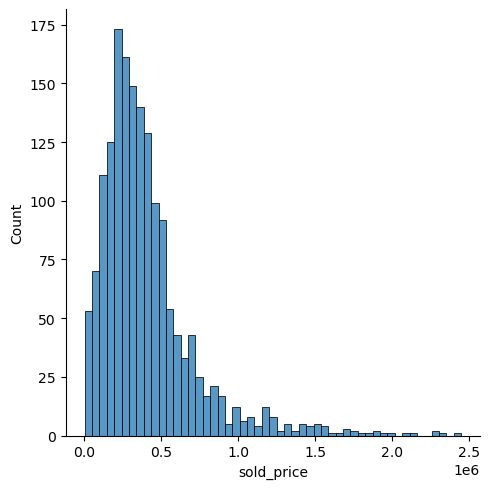

In [625]:
# Explore target with histogram
warnings.filterwarnings("ignore")

print('skewed value: ' + str(df['sold_price'].skew()))

sns.displot(df_under_2500000['sold_price'])
plt.show()
#Data is clearly left skewed

**-Transform Target 'sold_price' Data**

skewed value: -0.7375653114689754


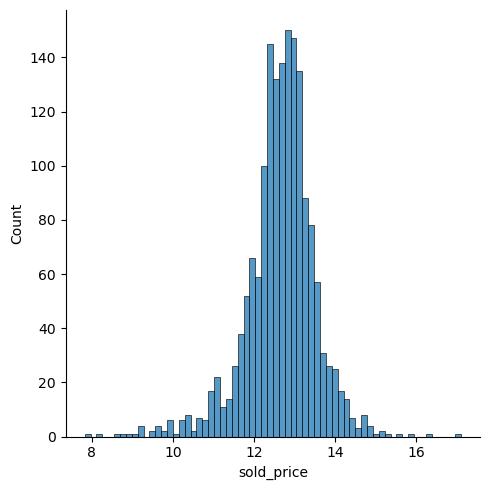

In [626]:
log_sold_price = np.log(df['sold_price'])

print('skewed value: ' + str(log_sold_price.skew()))

sns.displot(log_sold_price)
plt.show()

In [627]:
sqrt_sold_price = np.sqrt(df['sold_price'])

print('skewed value: ' + str(sqrt_sold_price.skew()))

# sns.displot(sqrt_sold_price)
# plt.show()

skewed value: 4.288807980125433


In [628]:
cbrt_sold_price = np.cbrt(df['sold_price'])

print('skewed value: ' + str(cbrt_sold_price.skew()))

# sns.displot(cbrt_sold_price)
# plt.show()

skewed value: 1.8147479794868075


**-Outliers of Target 'sold_price' Data**

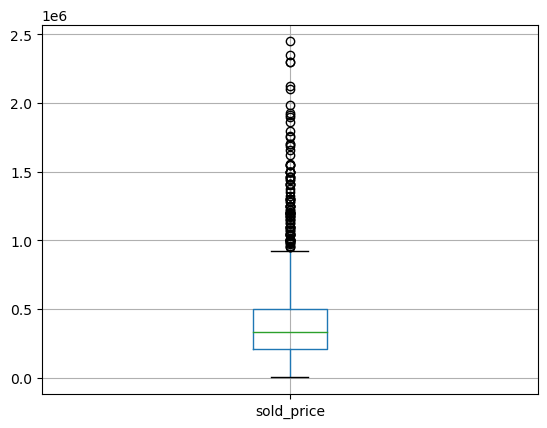

In [629]:
df_under_2500000.boxplot(column=['sold_price'])
plt.show()
#upper outliers are going to be very problematic if we do not transform and or remove outliers

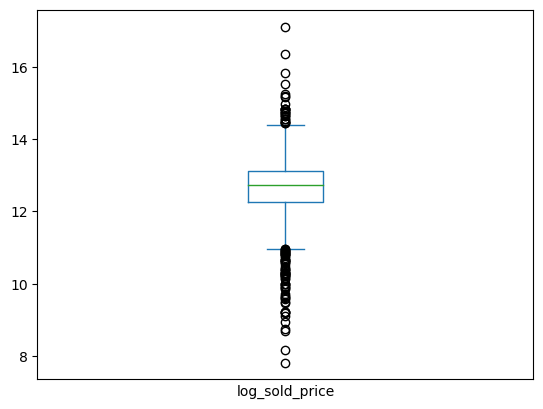

In [630]:
log_sold_price.plot.box(xticks=[]);

# Print the summary statistics
# print(log_sold_price.describe())

plt.xlabel('log_sold_price');

plt.show(block=True)

**-IQR Filtering for 'sold_price' (with skewed distribution)**

In [631]:
#calculate IQR
#Help from: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
percentile_25 = log_sold_price.quantile(0.25)
percentile_25 = df['sold_price'].quantile(0.25)
print('percentile_25:'+ str(percentile_25))
percentile_75 = df['sold_price'].quantile(0.75)
print('percentile_75:'+ str(percentile_75))
iqr = percentile_75 - percentile_25
print('inter-quartile range:' + str(iqr))

#calculate upper and lower limits
upper_limit = percentile_75 + (1.5 * iqr)
print('upper_limit:' + str(upper_limit))
lower_limit = percentile_25 - (1.5 * iqr)
print('lower_limit:' + str(lower_limit))

#identify outliers
print('sold_price outliers:' + str(len(df[df['sold_price'] > upper_limit])))
# df[df['sold_price'] > upper_limit].head(3)

#No instances of 'sold_price' below lower limit
# df[df['sold_price'] < lower_limit]

#Trim outliers
# df = df[df['sold_price'] < upper_limit]
# df.shape

percentile_25:212375.0
percentile_75:505000.0
inter-quartile range:292625.0
upper_limit:943937.5
lower_limit:-226562.5
sold_price outliers:115


**-IQR Filtering for 'log_sold_price'**

In [632]:
#calculate IQR
#Help from: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
percentile_25 = log_sold_price.quantile(0.25)
print('percentile_25:'+ str(percentile_25))
percentile_75 = log_sold_price.quantile(0.75)
print('percentile_75:'+ str(percentile_75))
iqr = percentile_75 - percentile_25
print('inter-quartile range:' + str(iqr))

#calculate upper and lower limits
log_sold_price_upper_limit = percentile_75 + (1.5 * iqr)
print('log_sold_price_upper_limit:' + str(e**log_sold_price_upper_limit))
log_sold_price_lower_limit = percentile_25 - (1.5 * iqr)
print('log_sold_price_lower_limit:' + str(e**log_sold_price_lower_limit))

#identify outliers
print('log_sold_price outliers(upper):' + str(len(log_sold_price[log_sold_price > log_sold_price_upper_limit])))
print('log_sold_price outliers(lower):' + str(len(log_sold_price[log_sold_price < log_sold_price_lower_limit])))

#No instances of 'sold_price' below lower limit
# df[df['sold_price'] < lower_limit]

#Trim outliers
# df = df[df['sold_price'] < upper_limit]
# df.shape

percentile_25:12.266108338923493
percentile_75:13.132313708257497
inter-quartile range:0.8662053693340042
log_sold_price_upper_limit:1851713.088292552
log_sold_price_lower_limit:57918.97238453455
log_sold_price outliers(upper):27
log_sold_price outliers(lower):61


**-Drop rows where sold price > log_sold_price_upper_limit**

In [633]:
df.shape

(1672, 74)

In [634]:
# #Drop columns where price is sold_price is greater that upper limit outliers in log transformed sold_price
# #Drop rows where sold price > log_sold_price_upper_limit

sold_price_upper_outlier_indices = df.loc[df['sold_price'] > (e**log_sold_price_upper_limit)].index
# print(sold_price_upper_outlier_indices)
print(str(len(sold_price_upper_outlier_indices)) + " rows dropped from dataframe with Upper Outliers values above: $" + str(e**log_sold_price_upper_limit))
df = df.drop(index = sold_price_upper_outlier_indices)

27 rows dropped from dataframe with Upper Outliers values above: $1851713.088292552


**-Drop rows where sold price < log_sold_price_lower_limit**

In [635]:
# #Drop columns where price is sold_price is less than lower limit outliers in log transformed sold_price
# #Drop rows where sold price < log_sold_price_lower_limit

sold_price_lower_outlier_indices = df.loc[df['sold_price'] < (e**log_sold_price_lower_limit)].index
# print(sold_price_lower_outlier_indices)
print(str(len(sold_price_lower_outlier_indices)) + " rows dropped from dataframe with Lower Outliers values below: $" + str(e**log_sold_price_lower_limit))
df = df.drop(index = sold_price_lower_outlier_indices)

61 rows dropped from dataframe with Lower Outliers values below: $57918.97238453455


In [636]:
print(df.shape)

(1584, 74)


In [637]:
###TO BE REMOVED###
# # warnings.filterwarnings("ignore")

# plt.figure(figsize=(24,16))

# plt.subplot(3,2,1)
# sns.distplot(df['baths'])

# plt.subplot(3,2,2)
# sns.distplot(df['baths_full'])

# plt.subplot(3,2,3)
# sns.distplot(df['baths_half'])

# plt.subplot(3,2,4)
# sns.distplot(df['beds'])

# plt.subplot(3,2,5)
# sns.distplot(df['garage'])

# plt.subplot(3,2,6)
# sns.distplot(df['stories'])

# plt.show()

In [638]:
#add bar graphs for categorical features

In [639]:
# # #lot_sqft and sqft not plotting properly or at all...
# plt.figure(figsize=(16,12))

# plt.subplot(1,2,1)
# sns.displot(df['lot_sqft'])

# plt.subplot(1,2,2)
# sns.displot(df['sqft'])

# plt.show()

**-Sqft and Lot_sqft by Sold_price** 

<Axes: xlabel='sqft', ylabel='sold_price'>

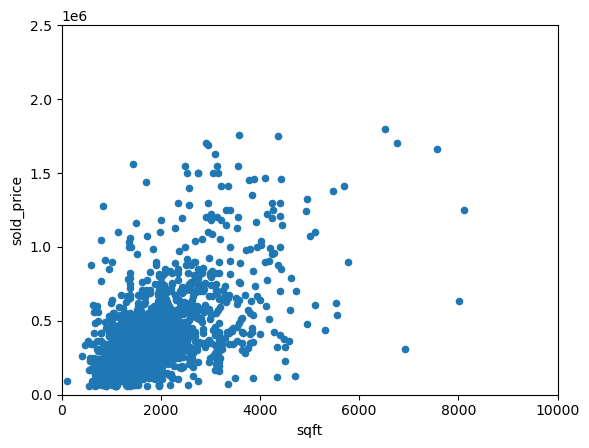

In [640]:
# scatter plot sold_price by lot_sqft
data = df[['sold_price', 'sqft']]
data.plot.scatter(x='sqft', y='sold_price', xlim= (0,10000), ylim=(0,2500000))

<Axes: xlabel='lot_sqft', ylabel='sold_price'>

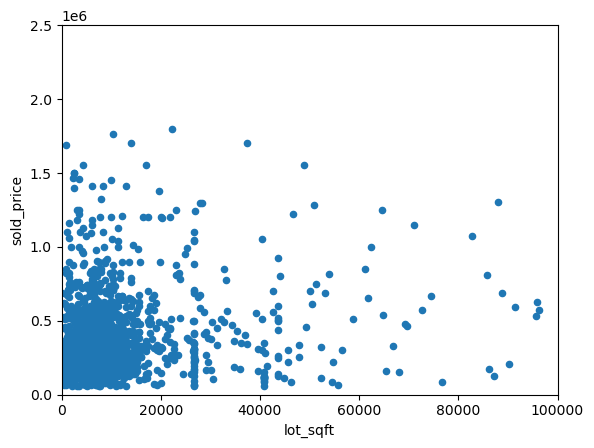

In [641]:
# scatter plot sold_price by lot_sqft
data = df[['sold_price', 'lot_sqft']]
data.plot.scatter(x='lot_sqft', y='sold_price', xlim= (0,100000), ylim=(0,2500000))

**-Year Built**

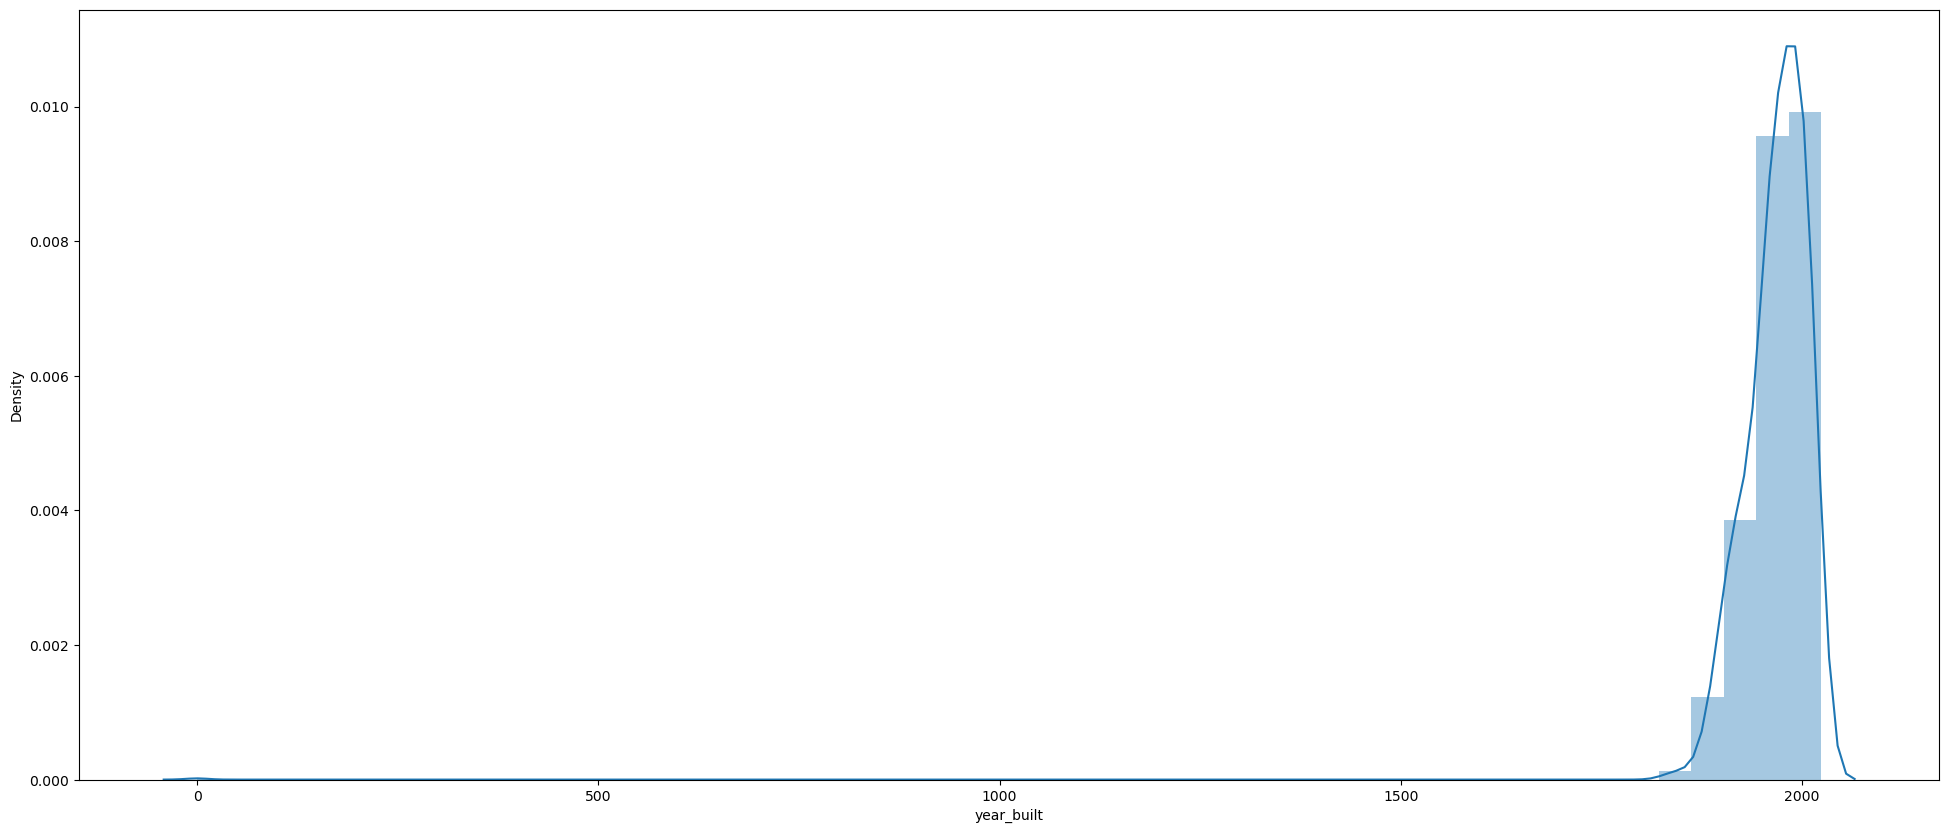

In [642]:
plt.figure(figsize=(24,10))

sns.distplot(df['year_built'])

plt.show()

In [643]:
df.loc[df['year_built'] == 0]
#ahhh yes, land has no year built, of course
#This may be problematic for analysis, we could perform some type of transformation maybe??

,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,type,year_built,is_price_reduced,city,lat,lon,postal_code,state,state_code,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market,Median Age,Total Population,Average Household Size
435,0,0,0,3,0,26618.398253,499300.0,1973.232759,1,single_family,0,False,Westerville,40.096367,-82.866679,43081,Ohio,OH,9414271198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2023,7,2023,75,33.284584,33000.0,2.468483


In [644]:
len(df.loc[df['type'] == 'land'])

0

<Axes: xlabel='year_built', ylabel='sold_price'>

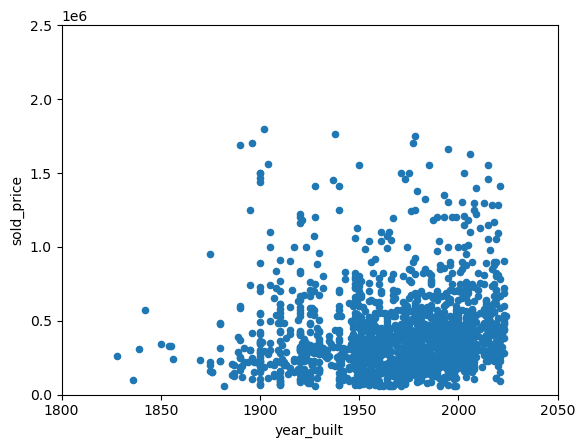

In [645]:
# scatter plot sold_price by year built
data = df[['sold_price', 'year_built']]
data.plot.scatter(x='year_built', y='sold_price', xlim= (1800,2050), ylim=(0,2500000))

In [646]:
# # YearBuilt
# data = df[['sold_price', 'year_built']]
# f, ax = plt.subplots(figsize=(16, 8))
# fig = sns.boxplot(x='year_built', y="sold_price", data=data)
# fig.axis(ymin=0, ymax=2500000)
# plt.xticks(rotation=90)

**-Scatterplots of Latitude and Longitude by Sold_Price**

<Axes: xlabel='lon', ylabel='sold_price'>

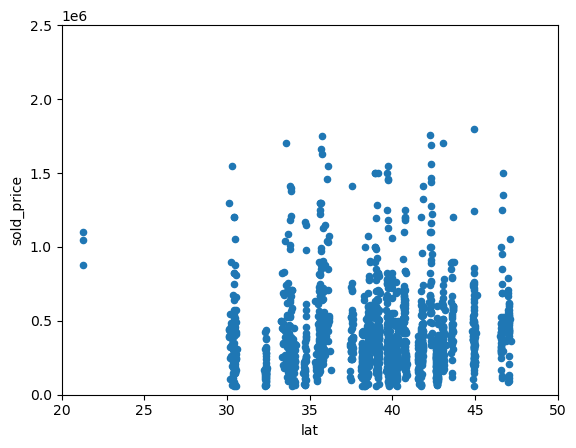

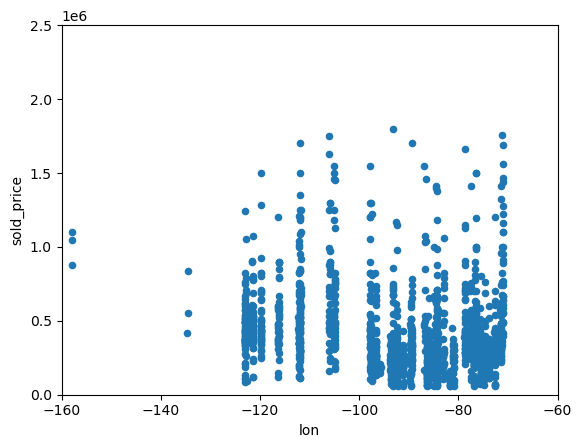

In [647]:
# fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

# ax1.set_title('Latitute')
# sns.scatterplot(x=df['sold_price'], y=df['lat'], data=df, ax=ax1)

# ax2.set_title('Longitude')
# sns.scatterplot(x=df['sold_price'], y=df['lon'], data=df, ax=ax2)

# scatter plot sold_price by lat
data = df[['sold_price', 'lat']]
data.plot.scatter(x='lat', y='sold_price', xlim= (20,50), ylim=(0,2500000))

# scatter plot sold_price by lon
data = df[['sold_price', 'lon']]
data.plot.scatter(x='lon', y='sold_price', xlim= (-160,-60), ylim=(0,2500000))

**-Explore Type by Sold Price**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'single_family'),
  Text(1, 0, 'townhomes'),
  Text(2, 0, 'condos'),
  Text(3, 0, 'mobile'),
  Text(4, 0, 'multi_family')])

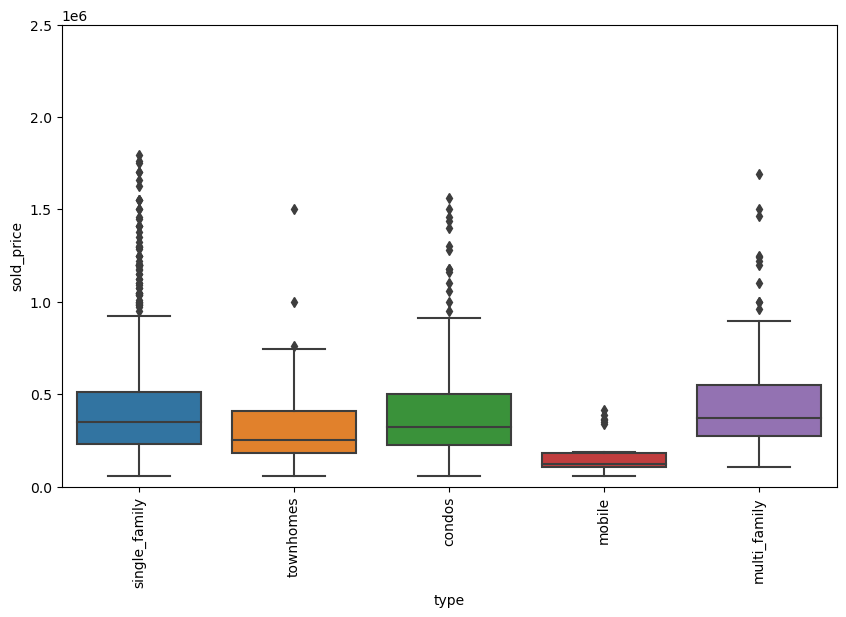

In [648]:
# boxplots of sold_price by 'type'
data = df[['sold_price', 'type']]
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='type', y="sold_price", data=data)
fig.axis(ymin=0, ymax=2500000)
plt.xticks(rotation=90)

**-Correlation Matrix**

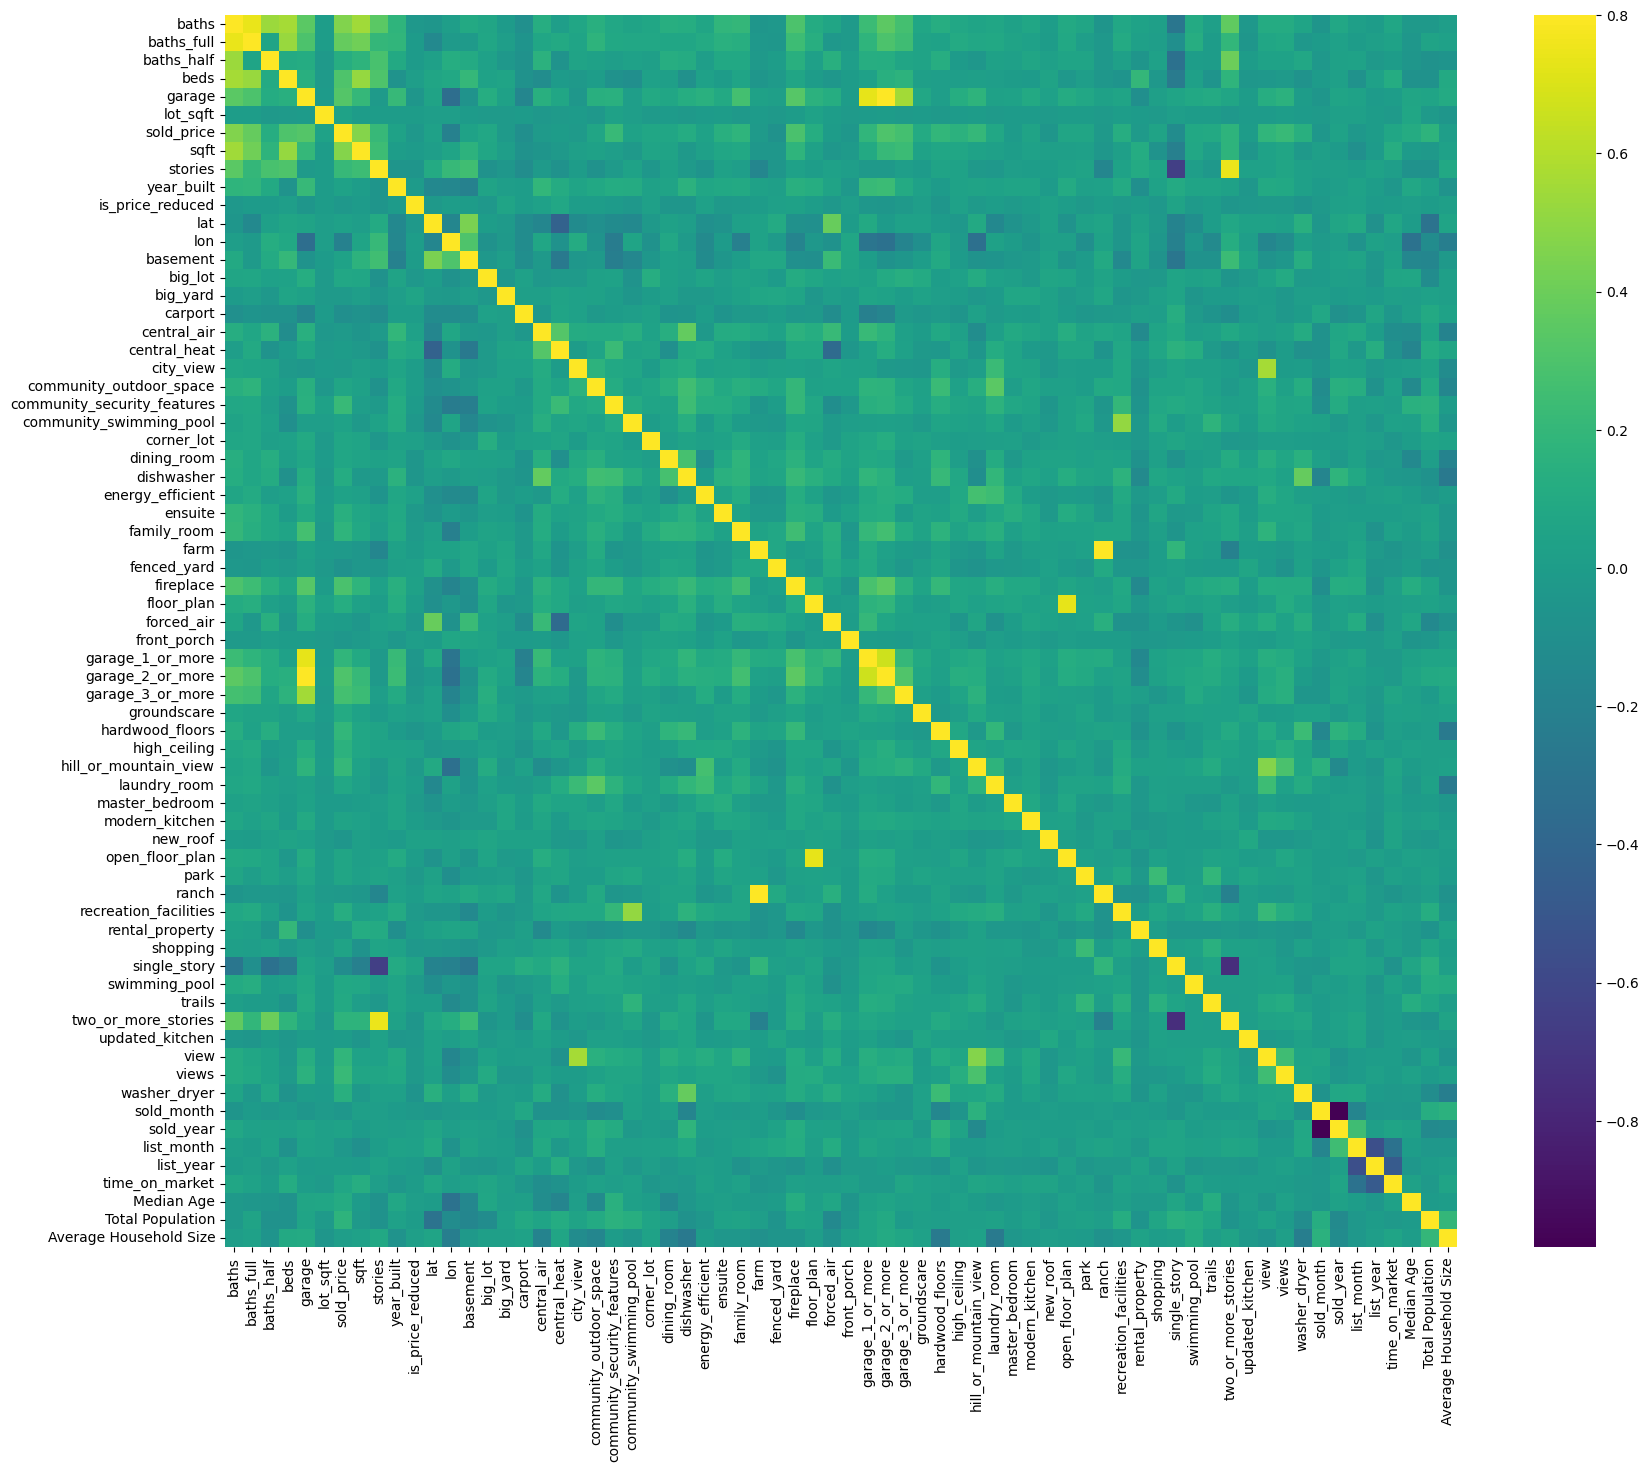

In [649]:
# Compute the correlation matrix
# df_corr = df.corr

# # Plot the heatmap
# sns.heatmap(df_corr, annot=True, cmap='coolwarm')
# plt.show()

# correlation matrix
corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='viridis')
plt.show()

# data=pd.DataFrame(corr_matrix["sold_price"].sort_values(ascending=False))
# ax = sns.heatmap(data, annot=True, vmin=-1, vmax=1, cmap='bwr') 
# ax.tick_params(labelrotation=0)
# plt.show()

# # Drop rows with non-numeric or empty values in 'sold_price'
# df = df[df['sold_price'].astype(str).str.isnumeric()]

# # Convert 'sold_price' column to integer
# df['sold_price'] = df['sold_price'].astype(int)

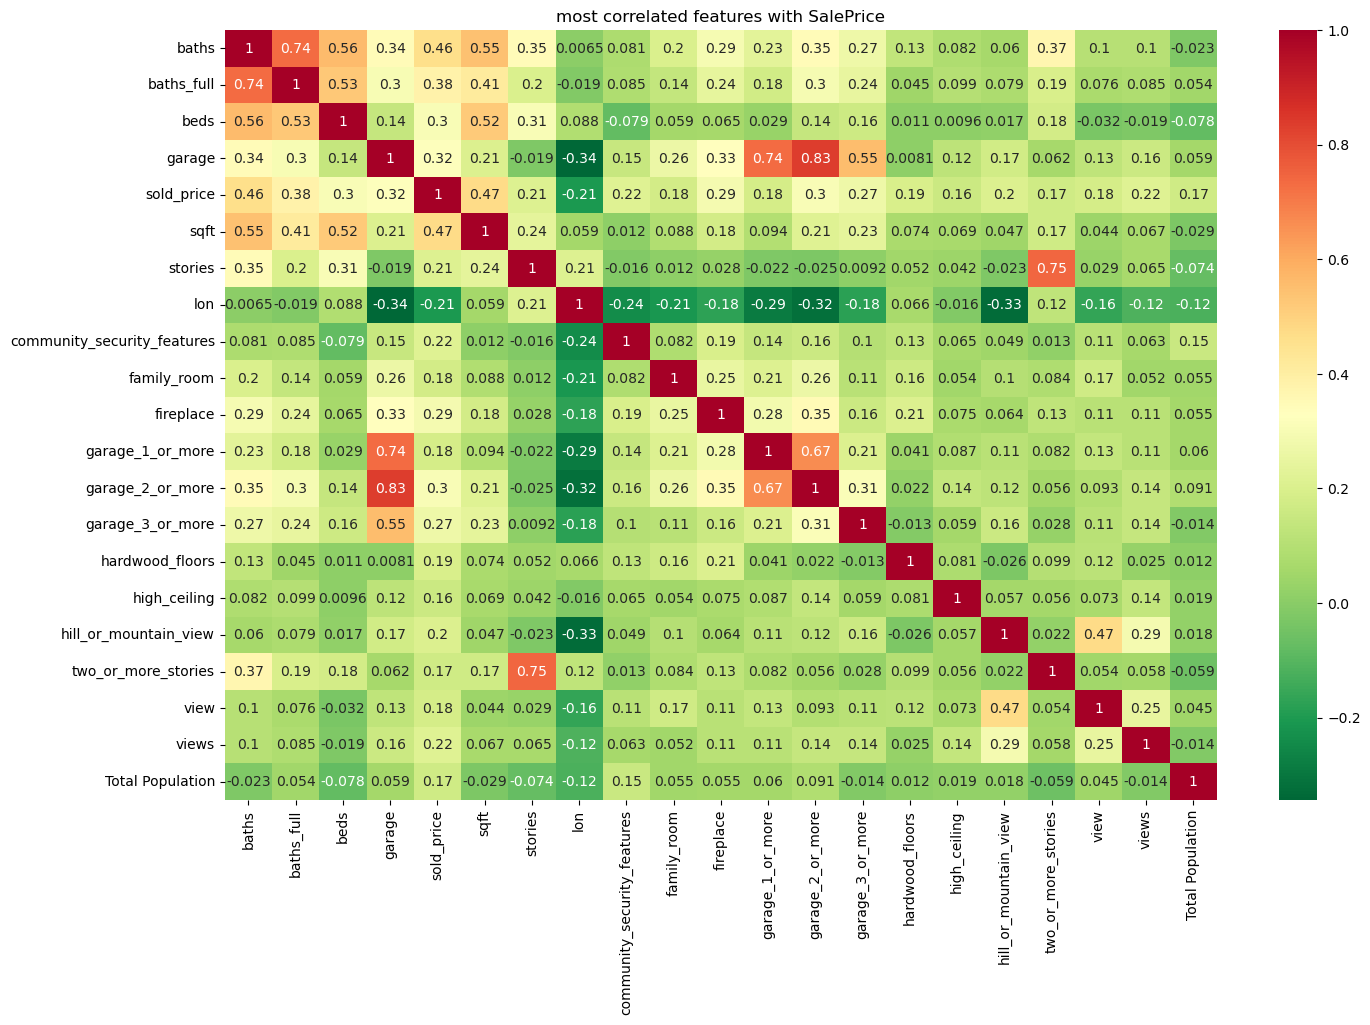

In [650]:
# most correlated features with sold_price
corrmat = df.corr(numeric_only=True)
top_corr_features = corrmat.index[abs(corrmat["sold_price"])>0.15]
plt.figure(figsize=(16,10))
g = sns.heatmap(df[top_corr_features].corr(numeric_only=True),annot=True,cmap="RdYlGn_r").set_title('most correlated features with SalePrice') 

**-Define target and features from dataframe**

In [651]:
# Extract feature and target arrays
# X, y = df_from_csv.drop('sold_price', axis=1), df_from_csv[['sold_price']]
# X, y = df.drop('sold_price', axis=1), df[['sold_price']]

# cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
# num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

**-Dataframe to CSV**

In [652]:
# # print(df.info())
# df.shape
# df.head(1)

In [653]:
df.to_csv('house_sales.csv', sep=',', header=True, index=False)

In [654]:
df_from_csv = pd.read_csv('house_sales.csv')
print(df_from_csv.shape)
df_from_csv.head(1)

(1584, 74)


,baths,baths_full,baths_half,beds,garage,lot_sqft,sold_price,sqft,stories,type,year_built,is_price_reduced,city,lat,lon,postal_code,state,state_code,property_id,basement,big_lot,big_yard,carport,central_air,central_heat,city_view,community_outdoor_space,community_security_features,community_swimming_pool,corner_lot,dining_room,dishwasher,energy_efficient,ensuite,family_room,farm,fenced_yard,fireplace,floor_plan,forced_air,front_porch,garage_1_or_more,garage_2_or_more,garage_3_or_more,groundscare,hardwood_floors,high_ceiling,hill_or_mountain_view,laundry_room,master_bedroom,modern_kitchen,new_roof,open_floor_plan,park,ranch,recreation_facilities,rental_property,shopping,single_story,swimming_pool,trails,two_or_more_stories,updated_kitchen,view,views,washer_dryer,sold_month,sold_year,list_month,list_year,time_on_market,Median Age,Total Population,Average Household Size
0,2,2,0,3,1,3485.0,259900.0,1963.0,2,single_family,1933,False,Lincoln,40.783403,-96.696476,68502,Nebraska,NE,8474302107,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,2024,12,2023,43,32.3,277346.0,2.4


Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

**-To Be Continued...**<br>
-Ensure ordinal datatype is all the same (Example 3 and 3.0 should both jsut be 3)<br>
-Change Boolean values to Binary<br>
-Normalize or Scale Data<br>
-Create Mean House Sale Value by City Column<br>

-Complete JSONFramer

In [655]:
# JSONFramer = JSONFramer('../data')
# df = JSONFramer.frame().dropna_target()
# # df = JSONFramer.dropna_target()
# df.info()

In [656]:
# JSONFramer = JSONFramer('../data')
# df = JSONFramer.frame()
# df.reset_index(drop=True, inplace=True)
# df.info()

To be continued...